# Practice Session: Monte Carlo simulation

2025.04.30 (wed)

TA: Semin Cheon. KAIST Physics department. chsm0338@kaist.ac.kr

## Topics:

### Discrete random walk on a 2D lattice: 
- Brownian motion

### Markov-chain Monte Carlo simulation
- Estimating internal energy of ideal gas in a box

### Finding global minimum: Simulated annealing 
- Exercise 10.10: f(x) = $x^{2}$ -cos4$\pi$x 


### Event generator : p-p collision in LHC
- Toy model of MC simulation - LHC: proton - proton collision

# Start!

## Discrete random walk on a 2D lattice: Brownian motion

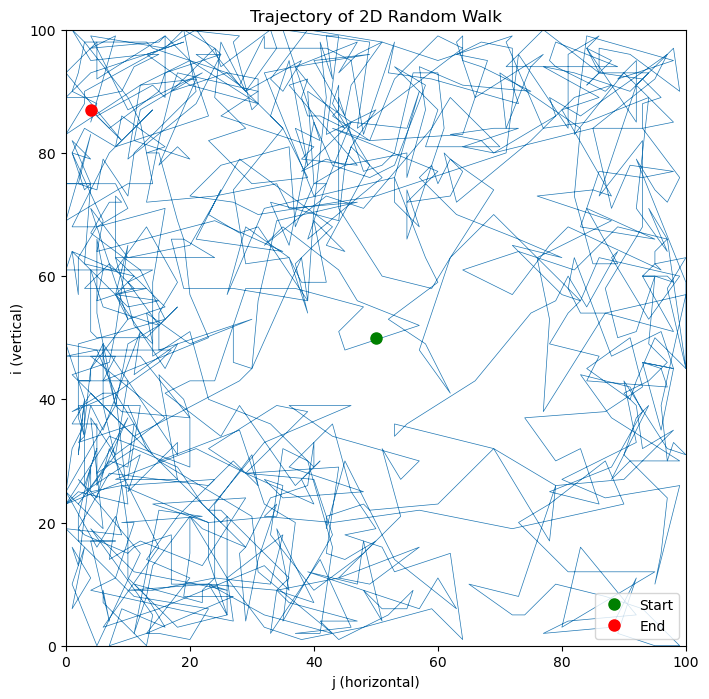

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from random import random, randrange
from math import sqrt, log, cos, sin, pi, exp

 mean position: 64.27772227772228 68.57342657342657


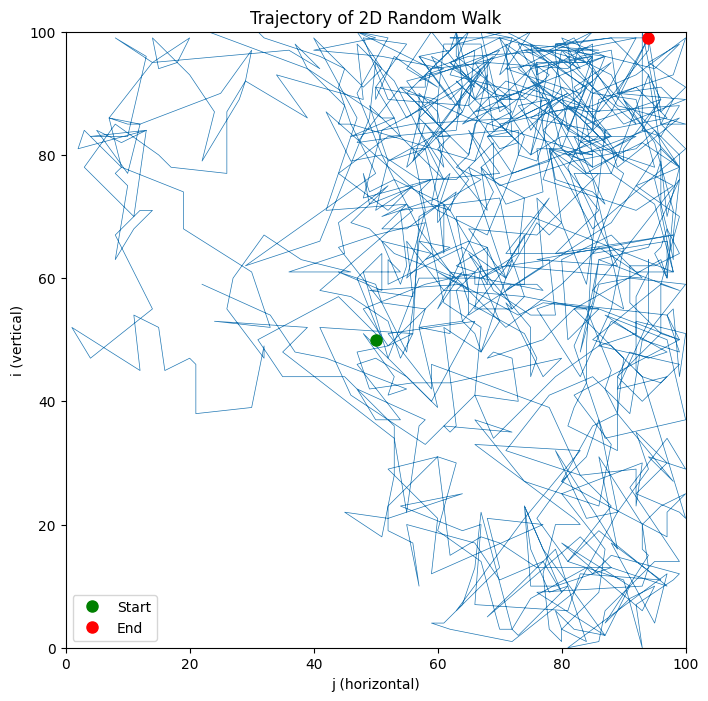

In [3]:
# Parameters
L = 101
num_steps = 10**5

# Starting position: center of the grid
i, j = np.floor(L/2), np.floor(L/2)

# Lists to store trajectory
positions = [(i, j)] # [(row, col)]
sampling_step = 100 # For visualization and calculating mean. Large value will looses resolution but light to display.

# Option for particle moving:
Jumping_size = 1
moves = [(Jumping_size, 0), (-Jumping_size, 0), (0, -Jumping_size), (0, Jumping_size)]  # Up, Down, Left, Right

# Simulate random walk
for count in range(num_steps):
    while True:
        di, dj = moves[np.random.randint(0, 4)]  # Choose random move. np.random.randint(0, 4) generates a random integer among 0, 1, 2, 3.
        new_i, new_j = i + di, j + dj # Update current position
        
        # Make sure the updated position is in the boundaries
        if 0 <= new_i < L and 0 <= new_j < L:
            i, j = new_i, new_j # Update the position i, and j with the updated position
            if count%sampling_step == 0:
                positions.append((i, j)) # Record the current position for display
            break # return to for loop
            
positions = np.array(positions) # 2D. ( Index, (row, col) )
mean_position = positions.mean(axis=0)

print( " mean position:", mean_position[0], mean_position[1])

plt.figure(figsize=(8, 8))
plt.plot(positions[10::,1], positions[10::,0], lw=0.5)  # (x=j, y=i)
plt.plot(positions[0,1], positions[0,0], 'go', label='Start', markersize=8)  # Start point
plt.plot(positions[-1,1], positions[-1,0], 'ro', label='End', markersize=8)  # End point
plt.title('Trajectory of 2D Random Walk')
plt.xlabel('j (horizontal)')
plt.ylabel('i (vertical)')
plt.legend()
plt.xlim(0, L-1)
plt.ylim(0, L-1)
# plt.gca().set_aspect('equal')
plt.show()
plt.close()

## Markov-chain Monte Carlo simulation
Estimating target distribution P(x) using stochastic process (transition probability) from the current state.

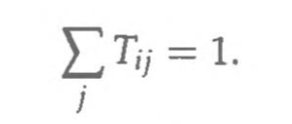
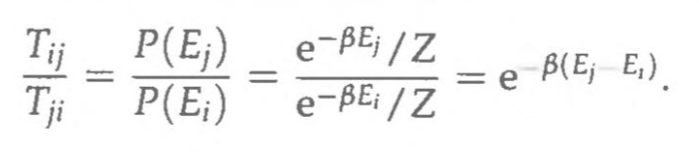  

### How to construct Markov chain (How to sample from the complex probability distribution)
- Metropolis–Hastings algorithm (Accept or Reject the next state)  
 New samples are added to the sequence in two steps: first a new sample is proposed based on the previous sample, then the proposed sample is either added to the sequence or rejected depending on the value of the probability distribution at that point. The resulting sequence can be used to approximate the distribution

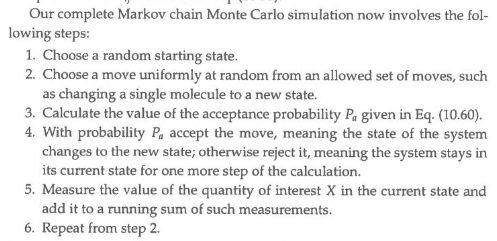

#### Textbook Exercise 10.3: Estimating internal energy of an ideal gas in a box
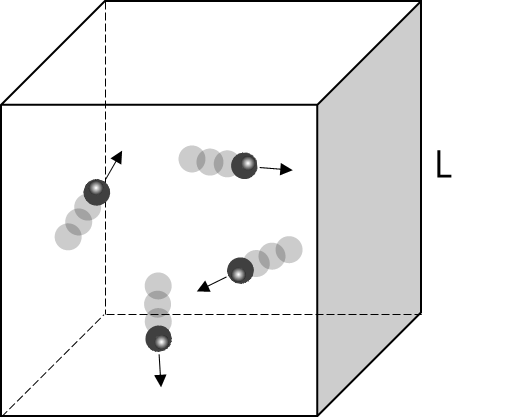
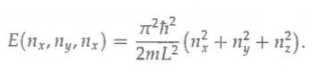
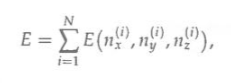

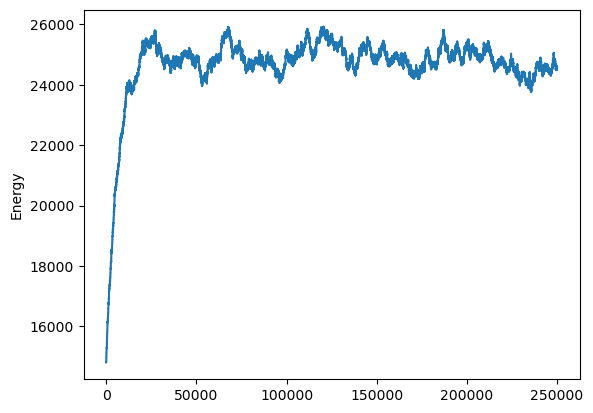

In [197]:
T = 10.0
N = 1000 # Number of particles
steps = 250000
n = np.ones([N,3],int)
E_save = []
E = 3*N*pi*pi/2

for k in range(steps):
    i = randrange(N) # Select one particle
    j = randrange(3) # Change quantum number nx or ny or nz

    # move state
    if random()<0.5:
        dn = 1 # Change the quantum number with dn
        dE = (2*n[i,j]+1)*pi**2/2
    else:
        dn = -1
        dE = (-2*n[i,j]+1)*pi**2/2

    # Accept or not
    if n[i,j]>1 or dn == 1:
        if random()<exp(-dE/T):
            n[i,j] += dn
            E += dE
    E_save.append(E)
plt.plot(E_save)
plt.ylabel("Energy")
plt.show()

##### 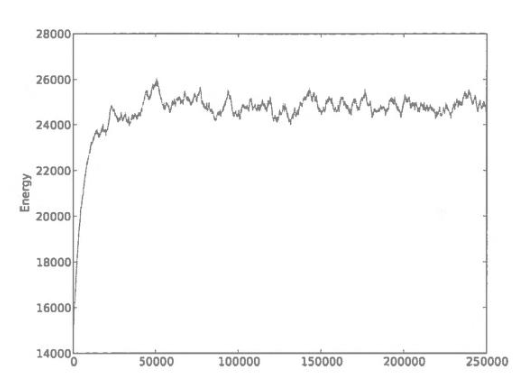

## Finding global minimum: Simulated Annealing

 Simulated Annealing is probabilistic optimization algorithm inspired by the physical process of annealing in metallurgy, where a material is heated and slowly cooled to reduce defects and reach a low-energy crystalline state.  

### How it works: (The example gif is finding global maximum but logic is same.)
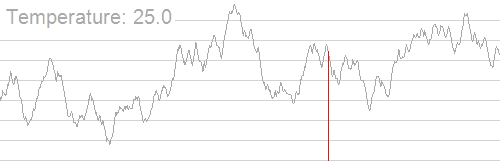  
 GIF: Simulated annealing searching for a maximum. The objective here is to get to the highest point. By cooling the temperature slowly the global maximum is found. (Reference: https://en.wikipedia.org/wiki/Simulated_annealing)
 
 - Temperature : Search width
 - Cooling schedule : Convergence rate (How cooling fast the temperature. Too Fast -> Can be stucked in local minima)


#### Textbook Exercise 10.10

In [152]:
def f(x):
    return x**2 - np.cos(4 * np.pi * x)#                              (a)
    # return np.cos(x) + np.cos(np.sqrt(2)*x) + np.cos(np.sqrt(3)*x)# (b)

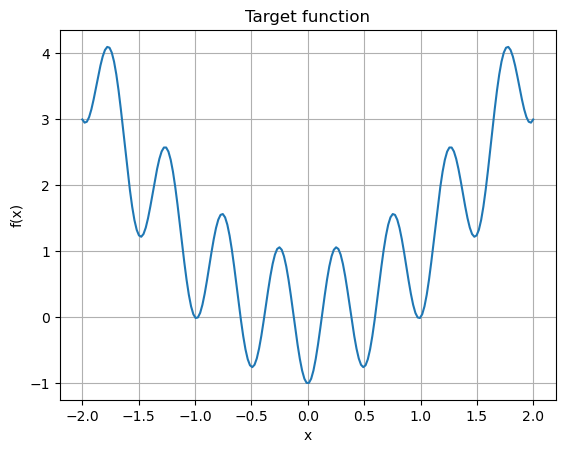

In [161]:
x_ = np.linspace(-2,2,200)
plt.plot( x_, f(x_) )
plt.title("Target function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()
plt.close()

In [198]:
# Parameters for Simulated Annealing
x = 2.0                        # Starting point
x_range = [-10, 50]            # Reject outside the range
T_start = 10.0                 # Initial temperature
T_end = 1e-3                   # Final temperature
alpha = 0.9                    # Cooling factor
Serach_number_per_T = 100      # Number of trials per temperature

sigma = 10.0                   # Standard deviation of Gaussian step

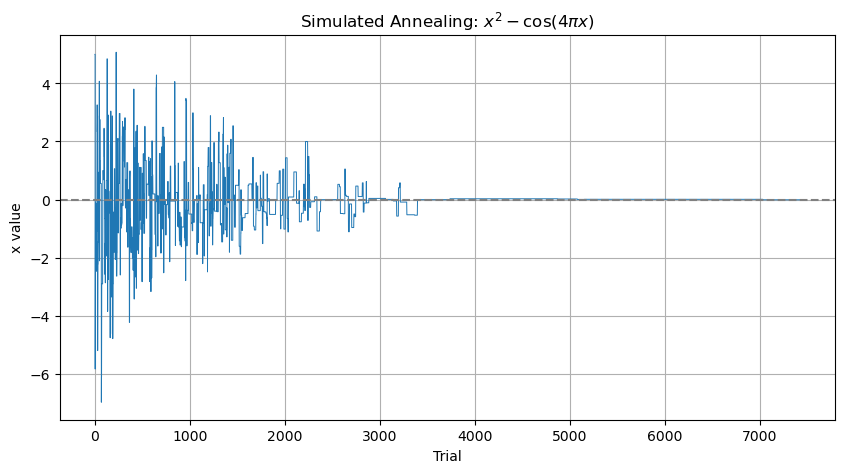

Estimated minimum x: -0.007166
Function value at estimated x: -0.995896


In [199]:
# Annealing loop

x_values = [x]
T = T_start

while T > T_end:
    for _ in range(n_iter_per_T):
        x_new = x + np.random.normal(0, sigma)   # Gaussian random walk

        if not (x_range[0] <= x_new <= x_range[1]):
            continue  # Reject move outside domain
        delta_E = f(x_new) - f(x)
        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
            x = x_new  # Accept move
        x_values.append(x)
    T *= alpha  # Exponential cooling
    
plt.figure(figsize=(10, 5))
plt.plot(x_values, lw=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Simulated Annealing: $x^2 - \cos(4\pi x)$")
plt.xlabel("Trial")
plt.ylabel("x value")
plt.grid(True)
plt.show()

# 🧾 Final result
print(f"Estimated minimum x: {x:.6f}")
print(f"Function value at estimated x: {f(x):.6f}")

## Monte carlo simulation as an Event generator: p-p collision in LHC

#### reference: 
- PYTHIA 8
- Maja Karwowska, et. al., Particle identification with machine learning in ALICE Run 3

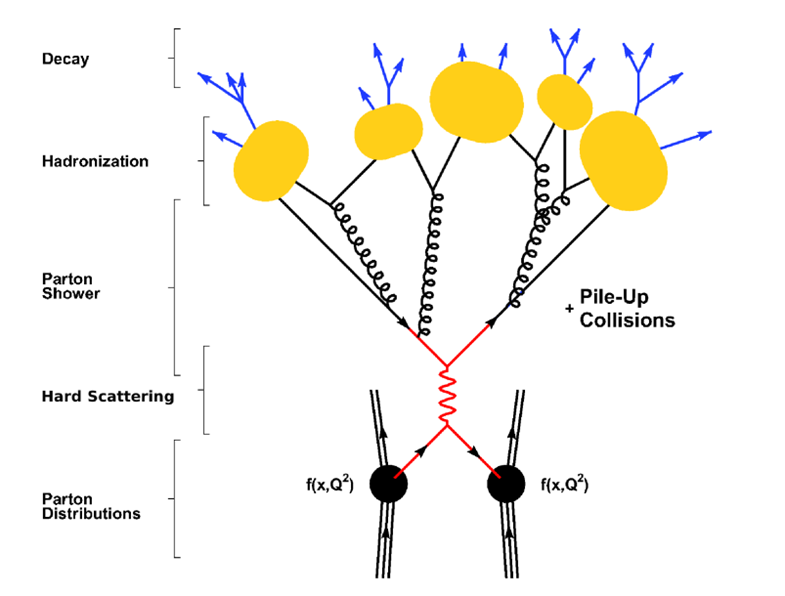  
(ref. Julia Bauer, Prospects for the Observation of Electroweak Top-Quark Production with the CMS Experiment, KIT, 2010 (Doctor dissertation))

In [200]:
import numpy as np
import matplotlib.pyplot as plt

In [206]:
# Constants
c = 3e8  # Speed of light (m/s)
energy_beam = 13000  # GeV, LHC usually uses ~15 TeV for p-p collision

TOF_LENGTH = 2.0  # meters
TPC_RESOLUTION = 0.15  # Fractional uncertainty
TOF_RESOLUTION = 0.002  # ns timing resolution
TOF_THRESHOLD = 0.001  # ns, adjust based on realistic detection limits
Parton_shower_iteration = 10000

# Partons and Hadrons
partons = ["u", "d", "s", "g"]
# Ref). EPJ Web of Conferences 175, 01006 (2018) Stirling
parton_probabilities = [0.015, 0.015, 0.07, 0.90] # Predetermined values from the Parton distribution in TeV region.

hadron_types = ["pi+", "pi-", "K+", "K-", "p", "p̄"]

hadron_masses = [0.14, 0.14, 0.49, 0.49, 0.94, 0.94]

# Ref).  A. M. Sirunyan et. Al., Measurement of charged pion, kaon, and proton production in proton-proton collisions at √ s = 13 TeV, PHYSICAL REVIEW D 96, 112003 (2017)
hadron_probabilities = [0.325, 0.325, 0.085, 0.085, 0.04, 0.04] # Predetermined values from the LHC collision experimental data in 13-TeV. For more general simulation, you have to directly calculate Lund string model.
hadron_probabilities_norm = np.sum(hadron_probabilities)
hadron_probabilities = hadron_probabilities/hadron_probabilities_norm

# ALICE detector calibrated parameters
DEDX_MEAN = {
    "pi+": 2.1, "pi-": 2.1,
    "K+": 2.5, "K-": 2.5,
    "p": 3.0, "p̄": 3.0
}

MASS = {
    "pi+": hadron_masses[0], "pi-": hadron_masses[0],  # Pions
    "K+": hadron_masses[2], "K-": hadron_masses[2],  # Kaons
    "p": hadron_masses[4], "p̄": hadron_masses[4]  # Protons & Antiprotons
}

In [207]:
# Sampling functions
def sample_parton():
    return np.random.choice(partons, p=parton_probabilities)

def sample_momentum_fraction():
    return np.random.beta(2, 5)

def sample_hadron():
    return np.random.choice(hadron_types, p=hadron_probabilities)

# Simulate primary interaction
def simulate_primary_interaction():
    """Simulates the initial hard scattering event."""
    parton1, parton2 = sample_parton(), sample_parton()
    x1, x2 = sample_momentum_fraction(), sample_momentum_fraction()
    sqrt_s = 2 * energy_beam * np.sqrt(x1 * x2)

    # print("Debug: 1 - simulate_primary_interaction work")

    # print(f" Collision: {parton1} ({x1:.3f}) + {parton2} ({x2:.3f}) → √s = {sqrt_s:.2f} GeV")  # Debugging

    return parton1, parton2, sqrt_s

# Define QCD splitting functions (approximations)
def P_q_to_qg(z):
    """Splitting function for q -> qg."""
    return (4/3) * (1 + z**2) / (1 - z)

def P_g_to_gg(z):
    """Splitting function for g -> gg."""
    return 3 * ((1 - z * (1 - z))**2) / (z * (1 - z))

def P_g_to_qqbar(z):
    """Splitting function for g -> q qbar."""
    return 0.5 * (z**2 + (1 - z)**2)

def sample_splitting_function(P, num_samples=1):
    """Sample z values from a given splitting function P(z) using rejection sampling."""
    z_values = []
    while len(z_values) < num_samples:
        z = np.random.uniform(0.1, 0.9)  # Avoid extreme soft/collinear limits
        P_max = 3  # Upper bound for normalization
        if np.random.uniform(0, P_max) < P(z):
            z_values.append(z)
    # print("Debug: 2 - sample_splitting_function work")
    return z_values[0] if num_samples == 1 else z_values

def simulate_parton_shower(initial_partons, initial_energies, max_iterations):
    """Simulates a simple parton shower starting from initial partons and energies."""
    
    shower = []  # Stores the final particles after showering
    
    parton_queue = list(zip(initial_partons, initial_energies))
    
    for _ in range(max_iterations):
        if not parton_queue:
            break

        parent_parton, parent_energy = parton_queue.pop(0)

        if parent_energy < 5:  # Energy cutoff (e.g., 10 GeV)
            shower.append((parent_parton, parent_energy))
            continue
        
        # Determine possible splittings
        if parent_parton == "q":  # Quark
            splitting_type = "q -> qg"
            z = sample_splitting_function(P_q_to_qg)
            daughter1, daughter2 = "q", "g"

        elif parent_parton == "g":  # Gluon
            if np.random.rand() < 0.5:  # 50% chance of g->gg or g->qqbar
                splitting_type = "g -> gg"
                z = sample_splitting_function(P_g_to_gg)
                daughter1, daughter2 = "g", "g"
            else:
                splitting_type = "g -> qqbar"
                z = sample_splitting_function(P_g_to_qqbar)
                daughter1, daughter2 = "q", "q̄"

        else:  # No splitting for other partons
            shower.append((parent_parton, parent_energy))
            continue

        # Energy assignment
        energy1 = z * parent_energy
        energy2 = (1 - z) * parent_energy

        # Store new partons
        parton_queue.append((daughter1, energy1))
        parton_queue.append((daughter2, energy2))

        # print(f"{parent_parton} ({parent_energy:.1f} GeV) → {daughter1} ({energy1:.1f} GeV) + {daughter2} ({energy2:.1f} GeV) [{splitting_type}]")
    # print("Debug: 3 - simulate_parton_shower work")
    return shower

# Hadronization
def hadronize(parton, parton_energy):
    """Converts a parton into hadrons via fragmentation, ensuring valid hadron energies."""
    hadrons = []
    remaining_energy = parton_energy
    MIN_KINETIC_ENERGY = 10  # Minimum kinetic energy in GeV to avoid near-zero momentum

    while remaining_energy > 0.1:  # Ensure sufficient energy remains
        hadron = sample_hadron()
        hadron_mass = MASS[hadron]

        # Ensure hadron energy is at least its rest mass + minimum kinetic energy
        min_energy = hadron_mass + MIN_KINETIC_ENERGY
        if remaining_energy < min_energy:
            break  # Stop if not enough energy to create another hadron

        hadron_energy = np.random.uniform(min_energy, remaining_energy)
        remaining_energy -= hadron_energy
        hadrons.append((hadron, hadron_energy))
    # print("Debug: 4 - hadronize work work")
    return hadrons

def full_hadronization(parton_shower):
    final_hadrons = []
    for parton, energy in parton_shower:
        hadrons = hadronize(parton, energy)
        final_hadrons.extend(hadrons)
    # print("Debug: 5 - full_hadronization work")
    return final_hadrons

# Detector Simulation
def simulate_tpc(hadron, energy):
    mass = MASS[hadron]
    # print(energy**2 - mass**2)
    momentum = np.sqrt(energy**2 - mass**2)
    measured_p = np.random.normal(momentum, TPC_RESOLUTION * momentum)
    # if measured_p < 0:
    #     measured_p = max(measured_p, momentum)
    dedx = np.random.normal(DEDX_MEAN[hadron], TPC_RESOLUTION)
    # print("Debug: 6 - simulate_tpc work")
    return measured_p, dedx

def simulate_tof(hadron, energy):
    mass = MASS[hadron]
    momentum = np.sqrt(energy**2 - mass**2)
    velocity = momentum / energy * c
    true_time = TOF_LENGTH / velocity

    # Apply Gaussian smearing
    measured_time = np.random.normal(true_time, TOF_RESOLUTION)
    
    # Ensure ToF is above threshold
    if measured_time < TOF_THRESHOLD:
        return np.nan  # Mark as invalid, to be removed later
    # print("Debug: 7 - simulate_tof work")
    return measured_time

def compute_mass(momentum, tof_time):
    if tof_time <= 0 or np.isinf(tof_time):  # Prevent division by zero or infinity
        return np.nan  # Assign NaN to be filtered out in visualization

    velocity = TOF_LENGTH / tof_time
    if velocity >= c:
        velocity = c - 1e-6  # Prevent exceeding speed of light

    gamma = 1 / np.sqrt(1 - (velocity / c) ** 2)
    mass = momentum / (gamma * velocity / c)
    # print("Debug: 8 - compute_mass work")
    return max(mass, 0)  # Ensure non-negative mass

def identify_particle(momentum, dedx, tof_time):
    mass_estimate = compute_mass(momentum, tof_time)
    if dedx < 2.5 and mass_estimate < 0.2:
        return "pi+"
    elif 2.5 < dedx < 3.5 and 0.3 < mass_estimate < 0.6:
        return "K+"
    elif dedx > 3.5 and mass_estimate > 0.8:
        return "p"
    else:
        return "Unknown"
    # print("Debug: 9 - identify_particle")
# Full Event Simulation
def simulate_collision_event():
    parton1, parton2, sqrt_s = simulate_primary_interaction()
    initial_partons = [parton1, parton2]
    initial_energies = [sqrt_s / 2, sqrt_s / 2]

    parton_shower = simulate_parton_shower(initial_partons, initial_energies, Parton_shower_iteration)
    hadrons = full_hadronization(parton_shower)
    # print("Debug: 10.1 - simulate_collision_event Hadronization work")
    detector_data = []
    for h, e in hadrons:
        measured_p, dedx = simulate_tpc(h, e)
        tof_time = simulate_tof(h, e)

        if np.isnan(tof_time):  # Remove particles with unphysically short ToF
            continue

        pid = identify_particle(measured_p, dedx, tof_time)
        detector_data.append((h, e, measured_p, dedx, tof_time, pid))
    # print("Debug: 10.2 - simulate_collision_event PID work")

    return detector_data


### Run experiments!

In [208]:
num_experiments = 50  # Run multiple events
all_event_data = []  # Store all event data

for i in range(num_experiments):
    event_data = simulate_collision_event()
    all_event_data.extend(event_data)  # Collect data from all events

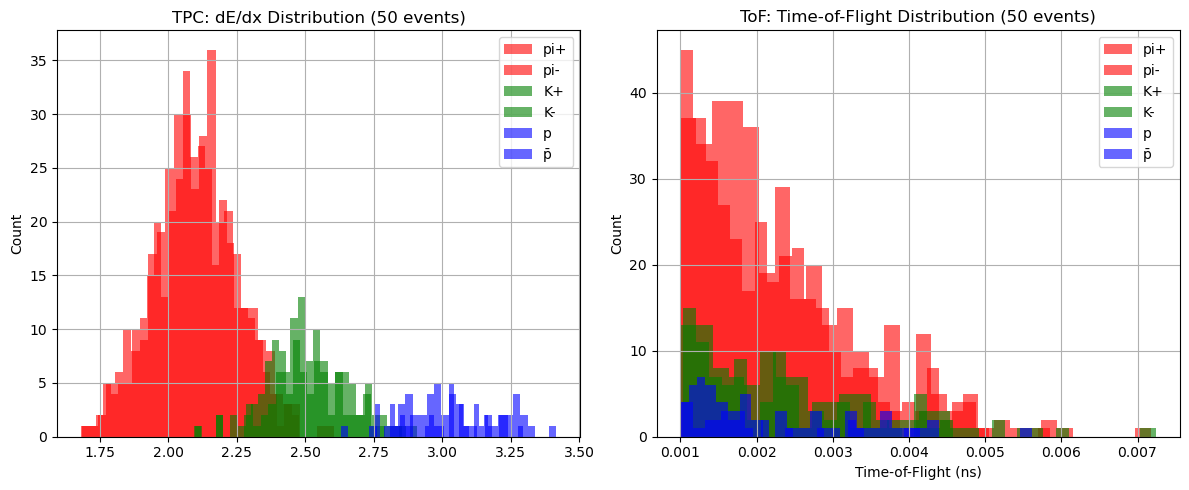

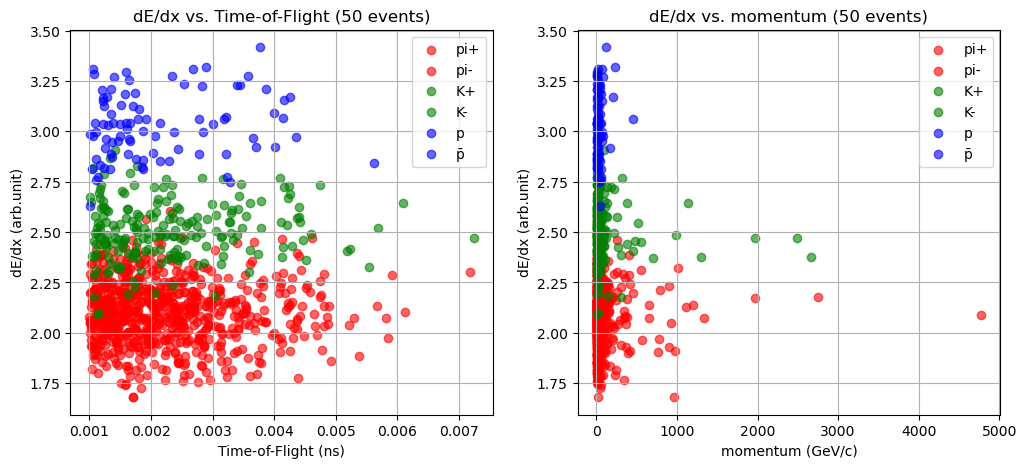

In [209]:
# Prepare data for visualization
mc_particle_types = {"pi+": [], "pi-": [], "K+": [], "K-": [], "p": [], "p̄": []}

# Color mapping for MC particles
colors = {"pi+": "r", "pi-": "r", "K+": "g", "K-": "g", "p": "b", "p̄": "b"}

for h, e, p, dedx, t, _ in all_event_data:  # Use MC truth (excluding PID)
    mass_estimate = compute_mass(p, t)
    # Ignore invalid values (NaN or inf)
    if not np.isnan(mass_estimate) and np.isfinite(mass_estimate):
        mc_particle_types[h].append((h, e, p, dedx, t))

# TPC: dE/dx Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for h in mc_particle_types:
    if mc_particle_types[h]:  # Check if we have data
        _,_,_,dedx_values, _ = zip(*mc_particle_types[h])
        plt.hist(dedx_values, bins=30, color=colors[h], alpha=0.6, label=h)

plt.ylabel("dE/dx (arb.unit)")
plt.ylabel("Count")
plt.title(f"TPC: dE/dx Distribution ({num_experiments} events)")
plt.legend()
plt.grid()

# ToF: Time-of-Flight Distribution
plt.subplot(1, 2, 2)
for h in mc_particle_types:
    if mc_particle_types[h]:  # Check if we have data
        _,_,_,_, tof_values = zip(*mc_particle_types[h])
        plt.hist(tof_values, bins=30, color=colors[h], alpha=0.6, label=h)

plt.xlabel("Time-of-Flight (ns)")
plt.ylabel("Count")
plt.title(f"ToF: Time-of-Flight Distribution ({num_experiments} events)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Scatter plot of dE/dx vs. Time-of-Flight
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for h in mc_particle_types:
    if mc_particle_types[h]:  # Check if we have data
        _,_,_,dedx_values, tof_values = zip(*mc_particle_types[h])
        plt.scatter(tof_values, dedx_values, color=colors[h], label=h, alpha=0.6)
plt.xlabel("Time-of-Flight (ns)")
plt.ylabel("dE/dx (arb.unit)")
plt.title(f"dE/dx vs. Time-of-Flight ({num_experiments} events)")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
# Scatter plot of dE/dx vs. momentum
for h in mc_particle_types:
    if mc_particle_types[h]:  # Check if we have data
        _,_,p_values, dedx_values,tof_values = zip(*mc_particle_types[h])
        plt.scatter(p_values, dedx_values, color=colors[h], label=h, alpha=0.6)
        
plt.xlabel("momentum (GeV/c)")
plt.ylabel("dE/dx (arb.unit)")
plt.title(f"dE/dx vs. momentum ({num_experiments} events)")
plt.legend()
plt.grid()
plt.show()

### Classification based on AI

#### Train

In [181]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
torch.backends.cudnn.enabled = False
device = torch.device("cpu")

In [7]:
# Re-categorizations: pi+ & pi- -> pi
#                      K+ &  K- -> K
#                      p  &  p̄  -> p

# Re-categorizing all_event_data using simplified categories: pi, K, p
# Define mapping for simplified categories
Re_particle_mapping = {"pi+": "pi", "pi-": "pi", "K+": "K", "K-": "K", "p": "p", "p̄": "p"}

# Prepare simplified dataset
Re_categorized_event_data = []

for h, e, p, dedx, t, pid in all_event_data:
    mass_estimate = compute_mass(p, t)
    if not np.isnan(mass_estimate) and np.isfinite(mass_estimate):
        Re_categorized_event_data.append([Re_particle_mapping[h], e, p, dedx, t])

# Convert to structured format
Re_categorized_event_data = np.array(Re_categorized_event_data, dtype=object)

In [8]:
# Reinitialize and convert simplified_all_event_data to PyTorch tensors
features = []
labels = []
label_mapping = {"pi": 0, "K": 1, "p": 2}  # Assign numerical labels for classification

for entry in Re_categorized_event_data:
    particle, energy, momentum, dedx, tof = entry  # Ignore PID result
    features.append([momentum, dedx, tof])
    labels.append(label_mapping[particle])

# Convert to PyTorch tensors
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.long)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features_tensor, labels_tensor, test_size=0.2, random_state=42)


In [9]:
# Define a simple neural network model for classification
class ParticleClassifier(nn.Module):
    def __init__(self):
        super(ParticleClassifier, self).__init__()
        self.fc1 = nn.Linear(3, 16)  # Input: 3 features (Momentum, dE/dx, ToF) -> Output 16 neurons
        self.fc2 = nn.Linear(16, 16) # Input: 16 → Output: 16 neurons
        self.fc3 = nn.Linear(16, 3)  # Output: 3 classes (pi, K, p)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x)) # Hidden Layer 1
        x = self.relu(self.fc2(x)) # Hidden Layer 2
        x = self.fc3(x)
        return x  # Raw logits (we will apply softmax in loss function)
        # return F.softmax(x, dim=1)  # Applying Softmax explicitly

# Instantiate model, loss function, and optimizer
model = ParticleClassifier().to(device)
criterion = nn.CrossEntropyLoss()
# criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [10]:
# Move data to CPU
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

# Training loop
num_epochs = 300
batch_size = 64

# Convert dataset into DataLoader for batching
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [11]:
# Training process
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")


Epoch [300/300], Loss: 0.1304


In [12]:
# Model evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_classes = torch.argmax(y_pred, dim=1)
    accuracy = (y_pred_classes == y_test).float().mean().item()

print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 95.93%


#### New experiment result for test

In [13]:
num_experiments = 10  # Run multiple events
test_event_data = []
Re_categorized_test_event_data = []  # Store all event data

for i in range(num_experiments):
    event_data = simulate_collision_event()
    test_event_data.extend(event_data)  # Collect data from all events
    
for h, e, p, dedx, t, pid in test_event_data:
    mass_estimate = compute_mass(p, t)
    if not np.isnan(mass_estimate) and np.isfinite(mass_estimate):
        Re_categorized_test_event_data.append([Re_particle_mapping[h], e, p, dedx, t])
        
Re_categorized_test_event_data = np.array(Re_categorized_test_event_data, dtype=object)

pi
K
p


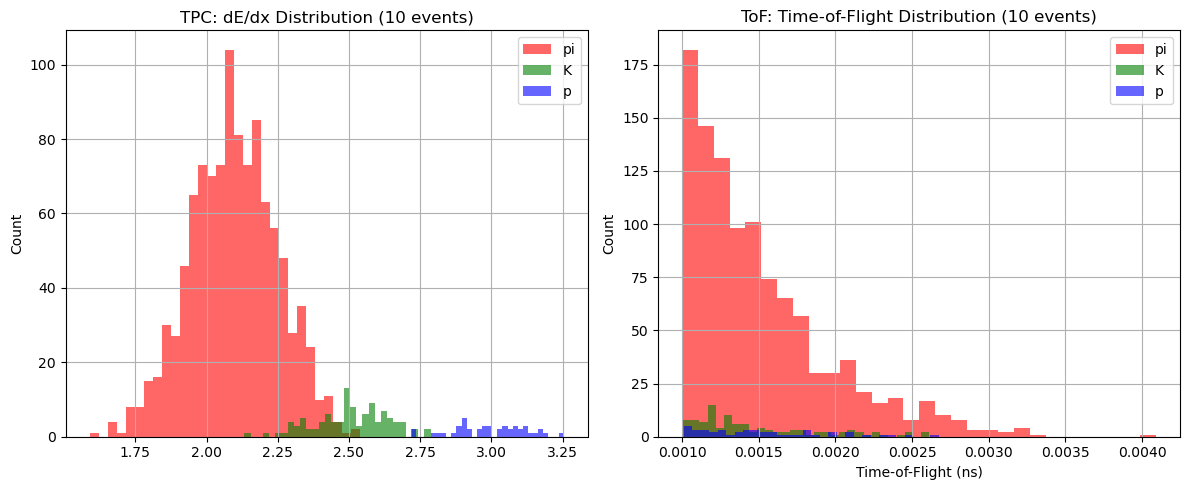

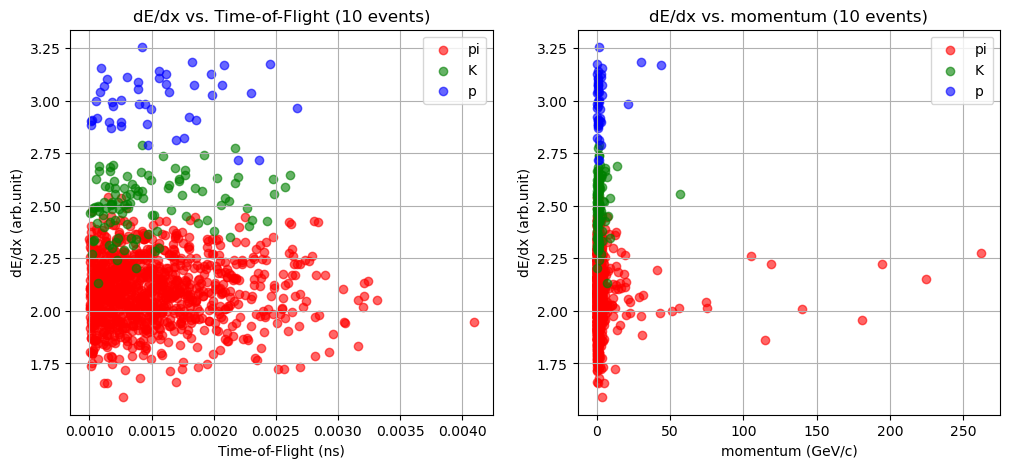

In [14]:
# Prepare data for visualization
test_mc_particle_types = {"pi": [], "K": [], "p": []}

# Color mapping for MC particles
colors = {"pi": "r", "K": "g", "p": "b"}

for h, e, p, dedx, t in Re_categorized_test_event_data:  # Use MC truth (excluding PID)
    mass_estimate = compute_mass(p, t)
    # Ignore invalid values (NaN or inf)
    if not np.isnan(mass_estimate) and np.isfinite(mass_estimate):
        test_mc_particle_types[h].append((h, e, p, dedx, t))

# TPC: dE/dx Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for h in test_mc_particle_types:
    print(h)
    if test_mc_particle_types[h]:  # Check if we have data
        _,_,_,dedx_values, _ = zip(*test_mc_particle_types[h])
        plt.hist(dedx_values, bins=30, color=colors[h], alpha=0.6, label=h)

plt.ylabel("dE/dx (arb.unit)")
plt.ylabel("Count")
plt.title(f"TPC: dE/dx Distribution ({num_experiments} events)")
plt.legend()
plt.grid()

# ToF: Time-of-Flight Distribution
plt.subplot(1, 2, 2)
for h in test_mc_particle_types:
    if test_mc_particle_types[h]:  # Check if we have data
        _,_,_,_, tof_values = zip(*test_mc_particle_types[h])
        plt.hist(tof_values, bins=30, color=colors[h], alpha=0.6, label=h)

plt.xlabel("Time-of-Flight (ns)")
plt.ylabel("Count")
plt.title(f"ToF: Time-of-Flight Distribution ({num_experiments} events)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Scatter plot of dE/dx vs. Time-of-Flight
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for h in test_mc_particle_types:
    if test_mc_particle_types[h]:  # Check if we have data
        _,_,_,dedx_values, tof_values = zip(*test_mc_particle_types[h])
        plt.scatter(tof_values, dedx_values, color=colors[h], label=h, alpha=0.6)
plt.xlabel("Time-of-Flight (ns)")
plt.ylabel("dE/dx (arb.unit)")
plt.title(f"dE/dx vs. Time-of-Flight ({num_experiments} events)")
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
# Scatter plot of dE/dx vs. momentum
for h in test_mc_particle_types:
    if test_mc_particle_types[h]:  # Check if we have data
        _,_,p_values, dedx_values,tof_values = zip(*test_mc_particle_types[h])
        plt.scatter(p_values, dedx_values, color=colors[h], label=h, alpha=0.6)
        
plt.xlabel("momentum (GeV/c)")
plt.ylabel("dE/dx (arb.unit)")
plt.title(f"dE/dx vs. momentum ({num_experiments} events)")
plt.legend()
plt.grid()
plt.show()

#### Machine result

In [15]:
test_features = [entry[2:] for entry in Re_categorized_test_event_data]  # Extract [momentum, dE/dx, ToF]
test_labels = [entry[0] for entry in Re_categorized_test_event_data]  # Extract true labels (particle types)

# Convert to PyTorch tensor
test_features_tensor = torch.tensor(test_features, dtype=torch.float32).to(device)

# Classify new data using trained model
model.eval()
with torch.no_grad():
    predictions = model(test_features_tensor)
    predicted_classes = torch.argmax(predictions, dim=1).cpu().numpy()

# Map numeric predictions back to particle labels
reverse_label_mapping = {0: "pi", 1: "K", 2: "p"}
predicted_labels = [reverse_label_mapping[p] for p in predicted_classes]


C:\Users\Semin0719\AppData\Local\Temp\ipykernel_9488\4226888958.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\Users\dev-admin\Desktop\build42\libtorch_1738271764196\work\torch\csrc\utils\tensor_new.cpp:281.)
  test_features_tensor = torch.tensor(test_features, dtype=torch.float32).to(device)


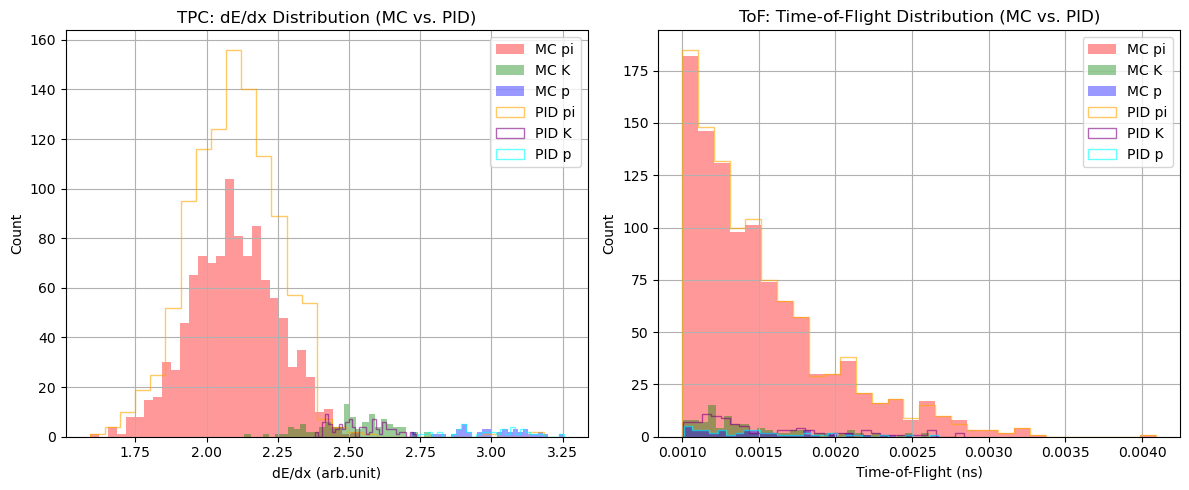

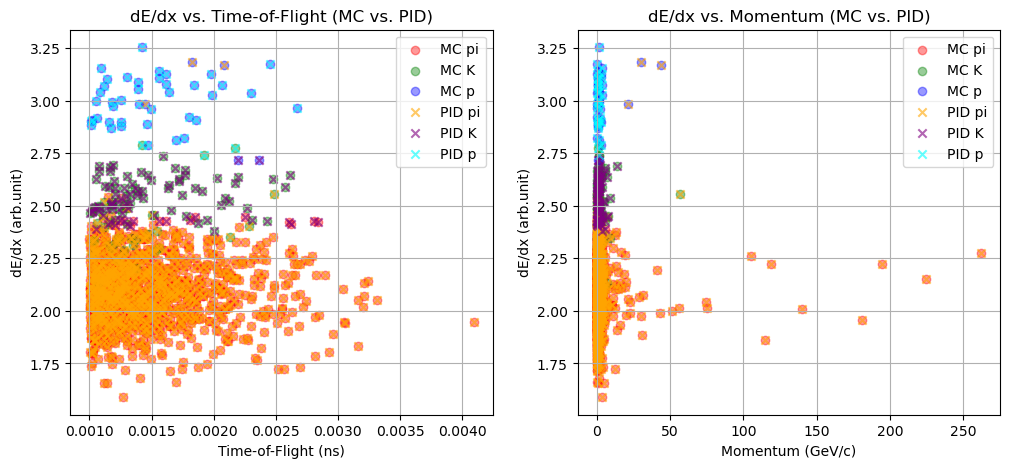

In [16]:
import matplotlib.pyplot as plt

# Prepare data for visualization with PID results
test_pid_particle_types = {"pi": [], "K": [], "p": []}

# Organize data by PID classification
for entry, predicted_label in zip(Re_categorized_test_event_data, predicted_labels):
    true_label, _, p, dedx, tof = entry  # Extract features
    test_pid_particle_types[predicted_label].append((true_label, p, dedx, tof))

# Colors for MC truth and PID results
mc_colors = {"pi": "r", "K": "g", "p": "b"}  # MC Truth Colors
pid_colors = {"pi": "orange", "K": "purple", "p": "cyan"}  # PID Result Colors

# TPC: dE/dx Distribution (MC truth vs. PID)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for h in test_mc_particle_types:
    if test_mc_particle_types[h]:  # Check if we have data
        _,_,_,dedx_values1, _ = zip(*test_mc_particle_types[h])
        plt.hist(dedx_values1, bins=30, color=mc_colors[h], alpha=0.4, label=f"MC {h}")

for h in test_pid_particle_types:
    if test_pid_particle_types[h]:  # Check if we have data
        _,_,dedx_values, _ = zip(*test_pid_particle_types[h])
        plt.hist(dedx_values, bins=30, color=pid_colors[h], alpha=0.6, label=f"PID {h}", histtype='step')

plt.ylabel("Count")
plt.xlabel("dE/dx (arb.unit)")
plt.title(f"TPC: dE/dx Distribution (MC vs. PID)")
plt.legend()
plt.grid()

# ToF: Time-of-Flight Distribution (MC truth vs. PID)
plt.subplot(1, 2, 2)
for h in test_mc_particle_types:
    if test_mc_particle_types[h]:  # Check if we have data
        _,_,_,_, tof_values = zip(*test_mc_particle_types[h])
        plt.hist(tof_values, bins=30, color=mc_colors[h], alpha=0.4, label=f"MC {h}")

for h in test_pid_particle_types:
    if test_pid_particle_types[h]:  # Check if we have data
        _,_,_, tof_values = zip(*test_pid_particle_types[h])
        plt.hist(tof_values, bins=30, color=pid_colors[h], alpha=0.6, label=f"PID {h}", histtype='step')

plt.xlabel("Time-of-Flight (ns)")
plt.ylabel("Count")
plt.title(f"ToF: Time-of-Flight Distribution (MC vs. PID)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Scatter plot of dE/dx vs. Time-of-Flight (MC truth vs. PID)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for h in test_mc_particle_types:
    if test_mc_particle_types[h]:  # Check if we have data
        _,_,_,dedx_values, tof_values = zip(*test_mc_particle_types[h])
        plt.scatter(tof_values, dedx_values, color=mc_colors[h], label=f"MC {h}", alpha=0.4)

for h in test_pid_particle_types:
    if test_pid_particle_types[h]:  # Check if we have data
        _,_,dedx_values, tof_values = zip(*test_pid_particle_types[h])
        plt.scatter(tof_values, dedx_values, color=pid_colors[h], marker="x", label=f"PID {h}", alpha=0.6)

plt.xlabel("Time-of-Flight (ns)")
plt.ylabel("dE/dx (arb.unit)")
plt.title(f"dE/dx vs. Time-of-Flight (MC vs. PID)")
plt.legend()
plt.grid()

# Scatter plot of dE/dx vs. Momentum (MC truth vs. PID)
plt.subplot(1, 2, 2)
for h in test_mc_particle_types:
    if test_mc_particle_types[h]:  # Check if we have data
        _,_,p_values, dedx_values, _ = zip(*test_mc_particle_types[h])
        plt.scatter(p_values, dedx_values, color=mc_colors[h], label=f"MC {h}", alpha=0.4)

for h in test_pid_particle_types:
    if test_pid_particle_types[h]:  # Check if we have data
        _, p_values, dedx_values, _ = zip(*test_pid_particle_types[h])
        plt.scatter(p_values, dedx_values, color=pid_colors[h], marker="x", label=f"PID {h}", alpha=0.6)

plt.xlabel("Momentum (GeV/c)")
plt.ylabel("dE/dx (arb.unit)")
plt.title(f"dE/dx vs. Momentum (MC vs. PID)")
plt.legend()
plt.grid()
plt.show()

In [17]:
# Compute accuracy, classification report, and confusion matrix
true_labels = [label_mapping[label] for label in test_labels]  # Convert true labels to numeric format
predicted_labels_numeric = predicted_classes  # Already numeric format from model prediction

# Compute accuracy
accuracy = accuracy_score(true_labels, predicted_labels_numeric)

# Display results
print(f"Test Accuracy: {accuracy * 100:.2f}%\n")

Test Accuracy: 95.79%

Classification Report:
               precision    recall  f1-score   support

          pi       0.97      0.98      0.98      1062
           K       0.79      0.73      0.76       105
           p       0.93      0.89      0.91        45

    accuracy                           0.96      1212
   macro avg       0.90      0.87      0.88      1212
weighted avg       0.96      0.96      0.96      1212

Confusion Matrix:
 [[1044   18    0]
 [  25   77    3]
 [   3    2   40]]
